<a href="https://colab.research.google.com/github/koad7/NLP_PYTORCH/blob/main/Word2VecCustomModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import gensim.downloader as api


In [21]:
w2v = api.load('word2vec-google-news-300')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
w2v.similarity('apple','mango')

0.57518554

In [32]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, w2v.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [34]:
print(w2v.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


In [44]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

words = ["one",'two','man','woman','table']

sample_vectors = np.array([w2v[word] for word in words])

pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)


### Visualize the words

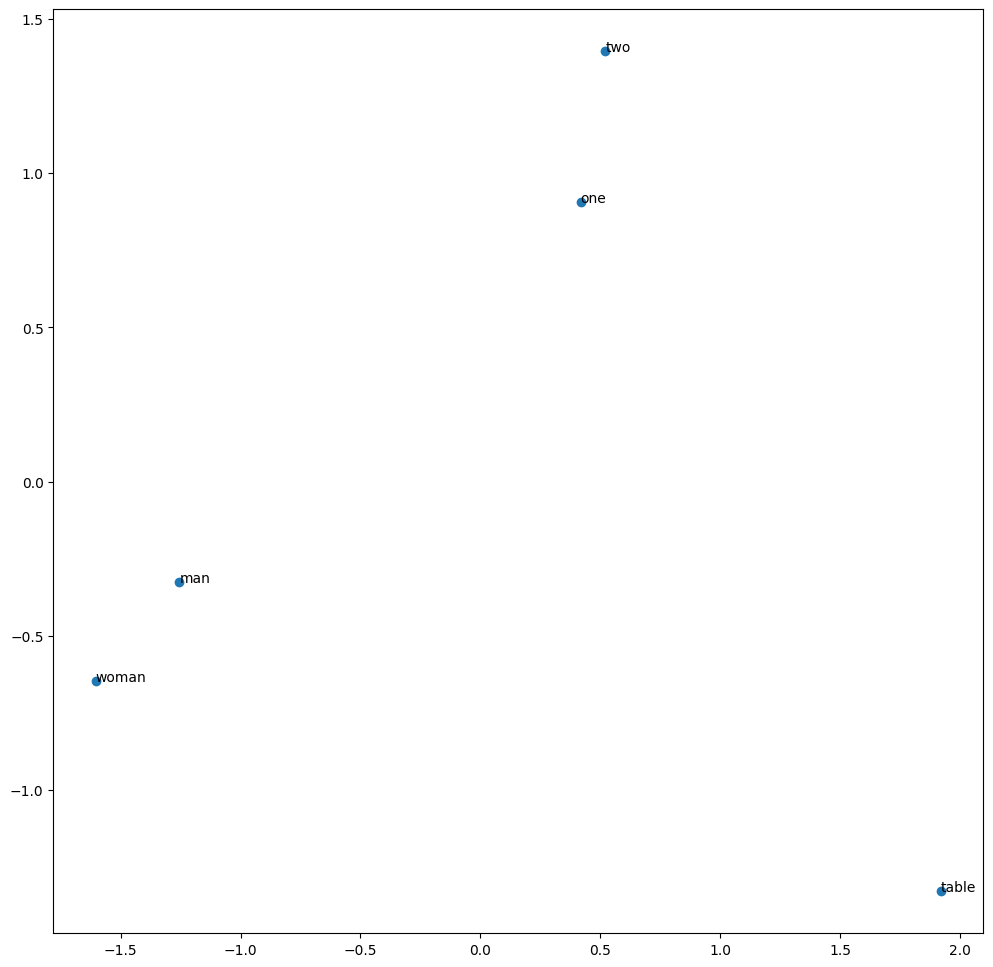

In [45]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()